In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import wordcloud as WordCloud

In [5]:
#importing the data or csv file
data=pd.read_csv('/content/amazon_prime_titles.csv')
data

show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2     Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3     Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4     Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   
...                                                 ...             ...   
9663                           Leo Gorcey, Bobby Jordan             NaN   
9664  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...             NaN   
9665  Ray Stevenson, Julian Wadham, Richard Brake, M...             NaN   
9666  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...             NaN   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...             NaN   

          date_added  release_year rating   duration                listed_in  \
0     March 30, 2021          2014    NaN    113 min            Comedy, Drama   
1     March 30, 2021          2018    13+    110 min     Drama, International   
2     March 30, 2021          2017    NaN     74 min  Action, Drama, Suspense   
3     March 30, 2021          2014    NaN     69 min              Documentary   
4     March 30, 2021          1989    NaN     45 min           Drama, Fantasy   
...              ...           ...    ...        ...                      ...   
9663             NaN          1940     7+     60 min                   Comedy   
9664             NaN          2018    13+  4 Seasons                 TV Shows   
9665             NaN          2008      R     90 min                   Action   
9666             NaN          2021  TV-MA   1 Season            Drama, Sports   
9667             NaN          2010      R    103 min  Action, Drama, Suspense   

                                            description  
0     A small fishing village must procure a local d...  
1     A Metro Family decides to fight a Cyber Crimin...  
2     After a man discovers his wife is cheating on ...  
3     Pink breaks the mold once again, bringing her ...  
4     Teenage Matt Banting wants to work with a famo...  
...                                                 ...  
9663  New York City street principles get an East Si...  
9664  This is Earth, 2100AD - and these are the adve...  
9665  In war-torn Eastern Europe, a world-weary grou...  
9666  The series tells the story of Diego Maradona, ...  
9667  Harry Brown, starring two-time Academy Award w...  

[9668 rows x 12 columns]

In [ ]:
#displays the first five rows
data.head()

show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, International   
2  March 30, 2021          2017    NaN   74 min  Action, Drama, Suspense   
3  March 30, 2021          2014    NaN   69 min              Documentary   
4  March 30, 2021          1989    NaN   45 min           Drama, Fantasy   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...  
3  Pink breaks the mold once again, bringing her ...  
4  Teenage Matt Banting wants to work with a famo...

In [ ]:
st=data.groupby("show_id")
st


In [ ]:
# prompt: calculate the mean of 1 column

data['imdb_rating'].mean()


AttributeError: module 'seaborn' has no attribute 'line'

In [ ]:
data[['show_id', 'title']].head()


show_id                 title
0      s1   The Grand Seduction
1      s2  Take Care Good Night
2      s3  Secrets of Deception
3      s4    Pink: Staying True
4      s5         Monster Maker

In [ ]:
#displays the last five rows
data.tail()

show_id     type                    title         director  \
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast country date_added  \
9663                           Leo Gorcey, Bobby Jordan     NaN        NaN   
9664  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...     NaN        NaN   
9665  Ray Stevenson, Julian Wadham, Richard Brake, M...     NaN        NaN   
9666  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...     NaN        NaN   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...     NaN        NaN   

      release_year rating   duration                listed_in  \
9663          1940     7+     60 min                   Comedy   
9664          2018    13+  4 Seasons                 TV Shows   
9665          2008      R     90 min                   Action   
9666          2021  TV-MA   1 Season            Drama, Sports   
9667          2010      R    103 min  Action, Drama, Suspense   

                                            description  
9663  New York City street principles get an East Si...  
9664  This is Earth, 2100AD - and these are the adve...  
9665  In war-torn Eastern Europe, a world-weary grou...  
9666  The series tells the story of Diego Maradona, ...  
9667  Harry Brown, starring two-time Academy Award w...

In [ ]:
#Data checking
# Shape data
data.shape

(9668, 12)

In [ ]:
# Show columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Showw data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
# Check duplicates data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool

In [ ]:
 #Check Null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#number of unique values for each column
data.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

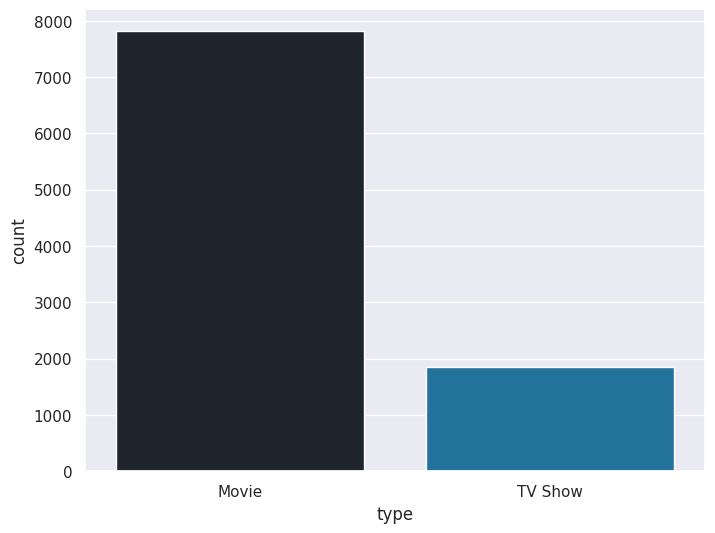

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
cp = sns.countplot(x="type", data=data, palette=["#1b2530", "#0f79af"])

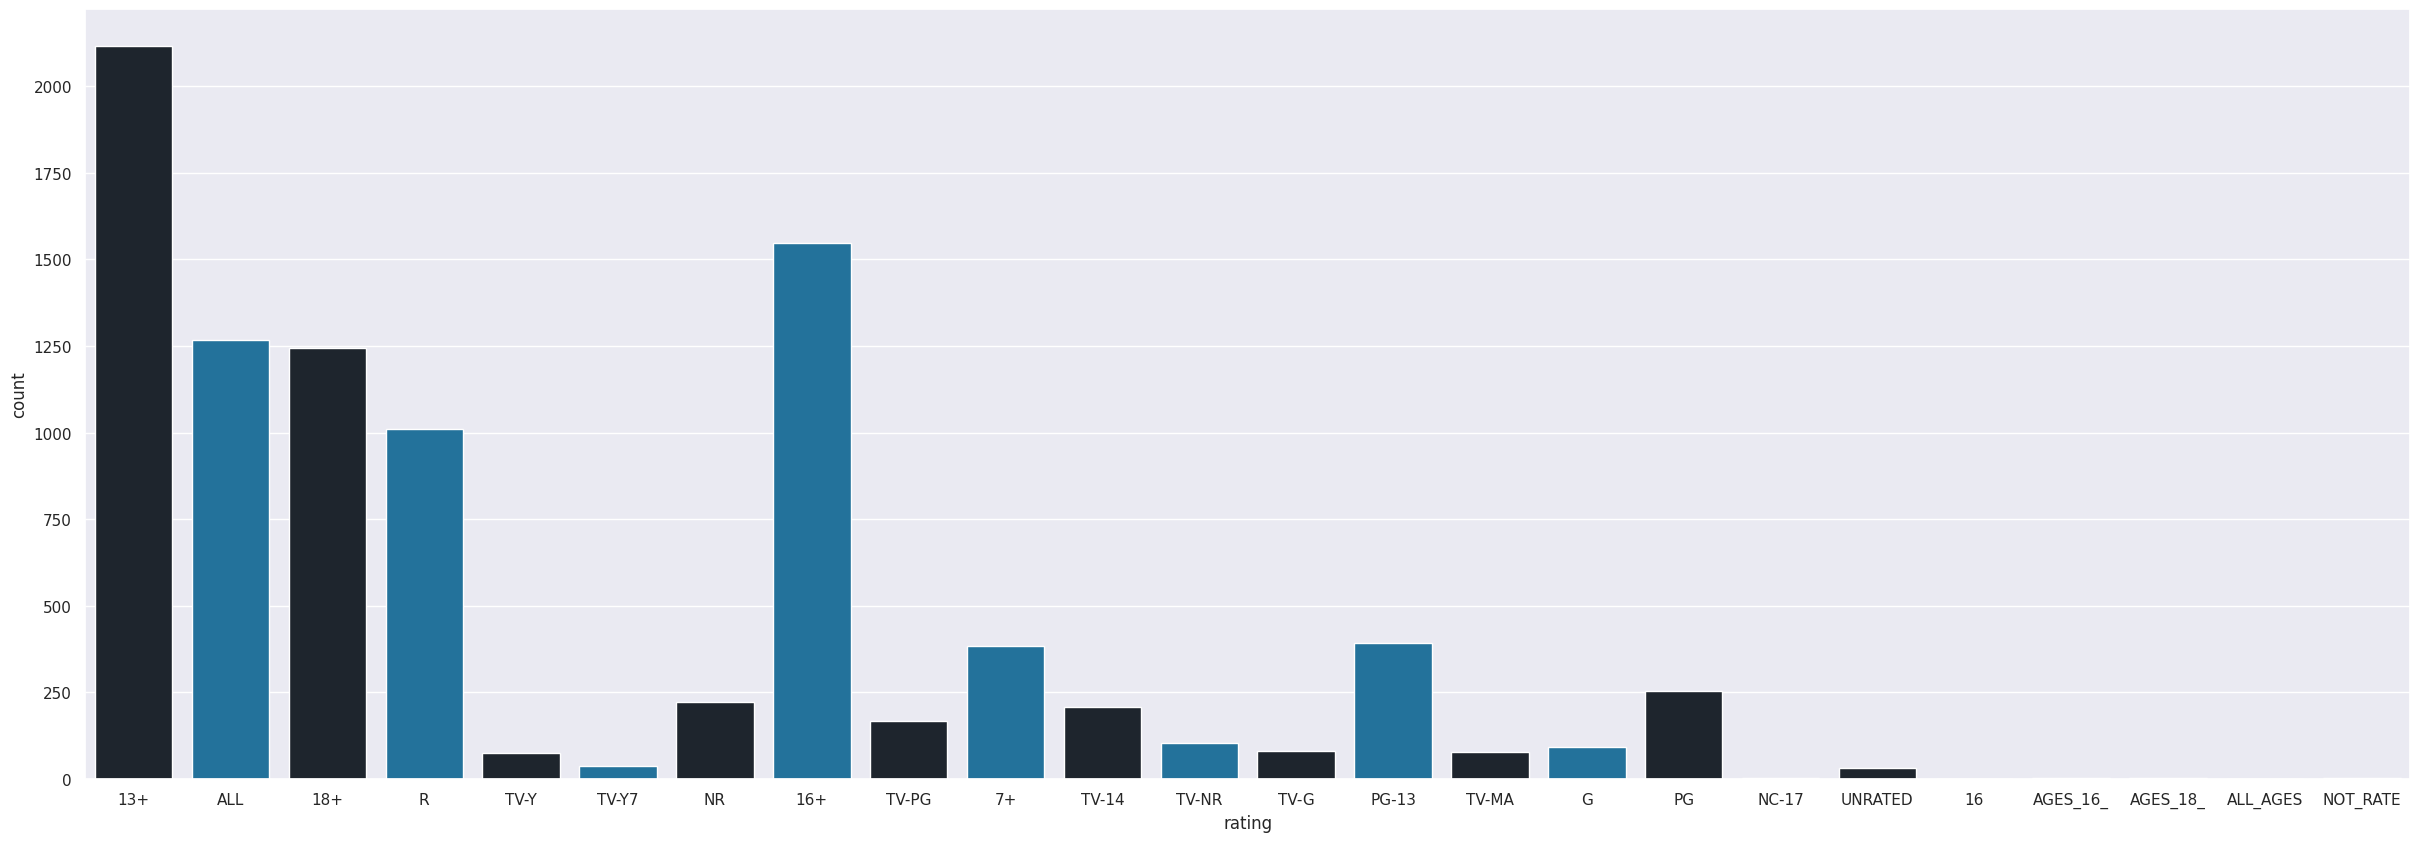

In [ ]:
plt.figure(figsize=(30,10))
sns.set(style="darkgrid")
cp = sns.countplot(x="rating", data=data, palette=["#1b2530", "#0f79af"])

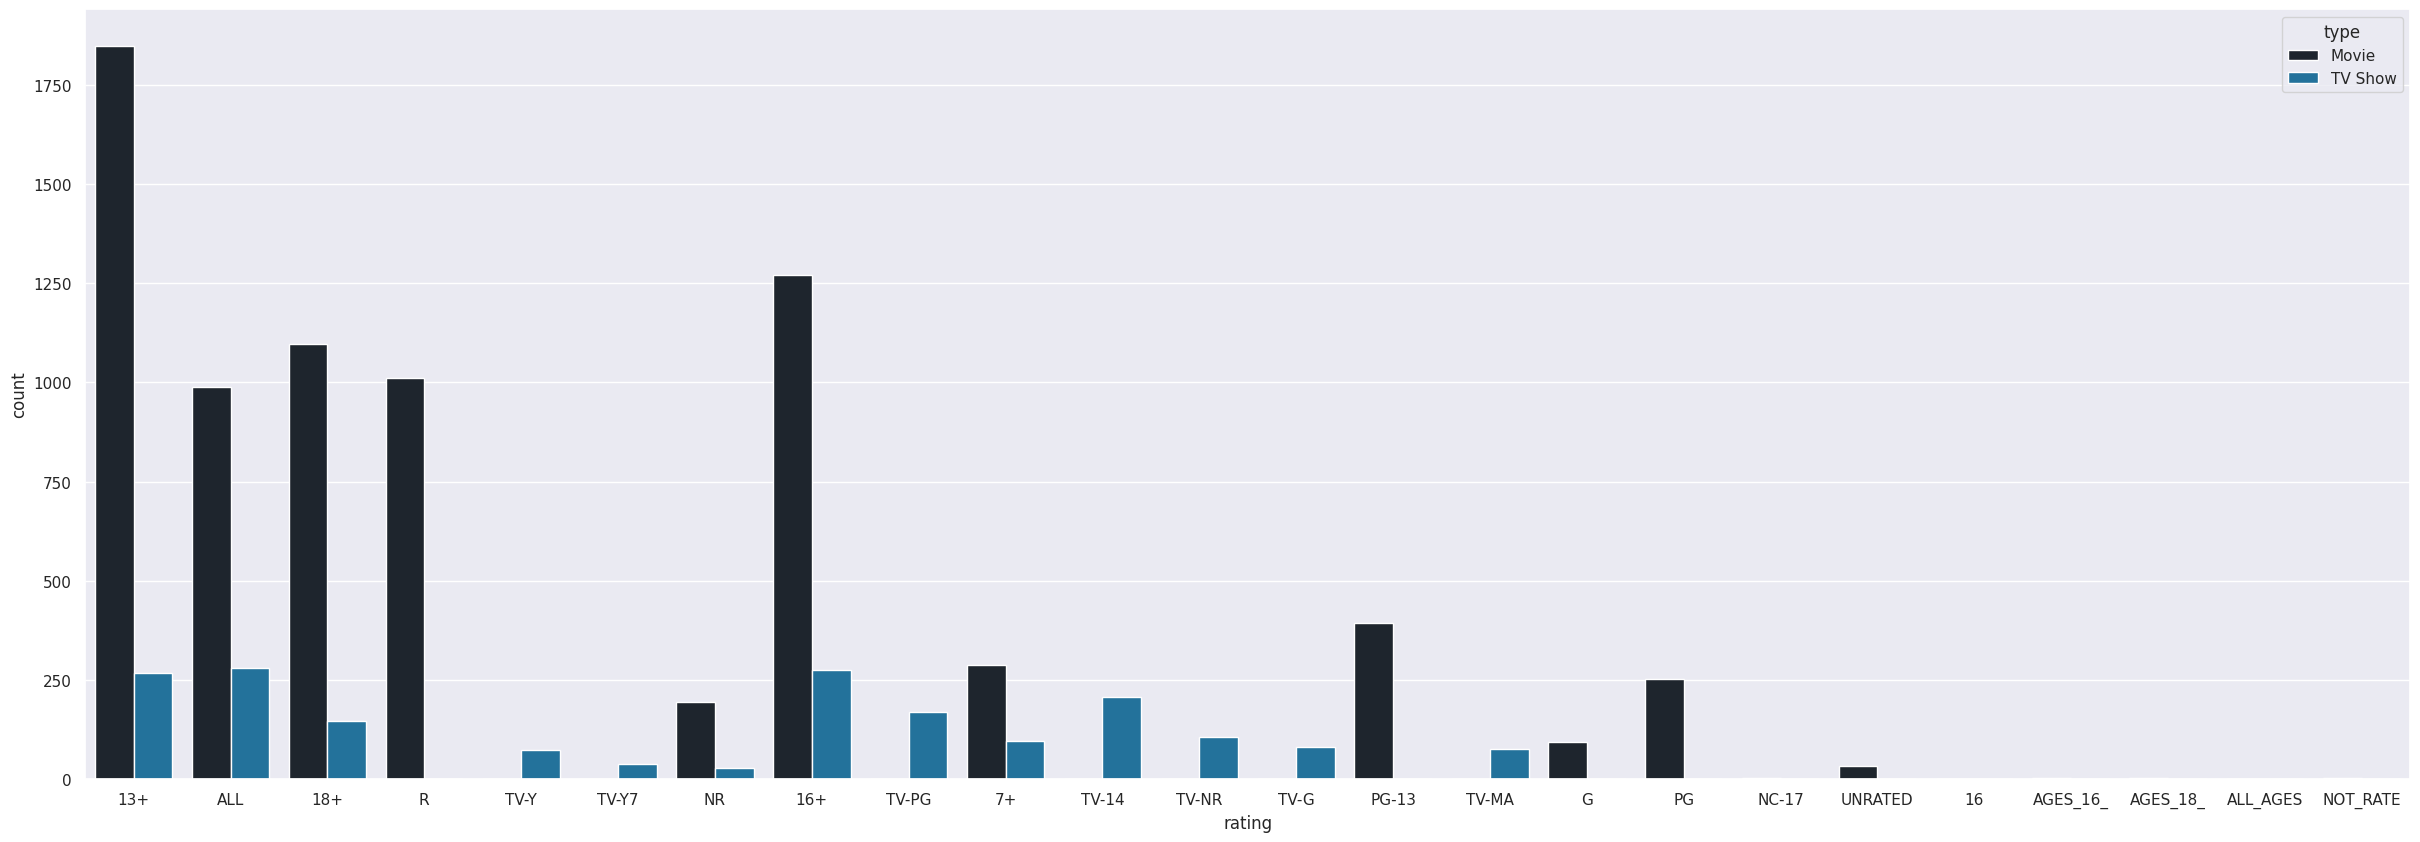

In [ ]:
plt.figure(figsize=(30,10))
r = sns.countplot(x= data['rating'],data=data,hue = 'type',palette=["#1b2530", "#0f79af"])

In [ ]:
txt1 = " ".join(title for title in data.title)

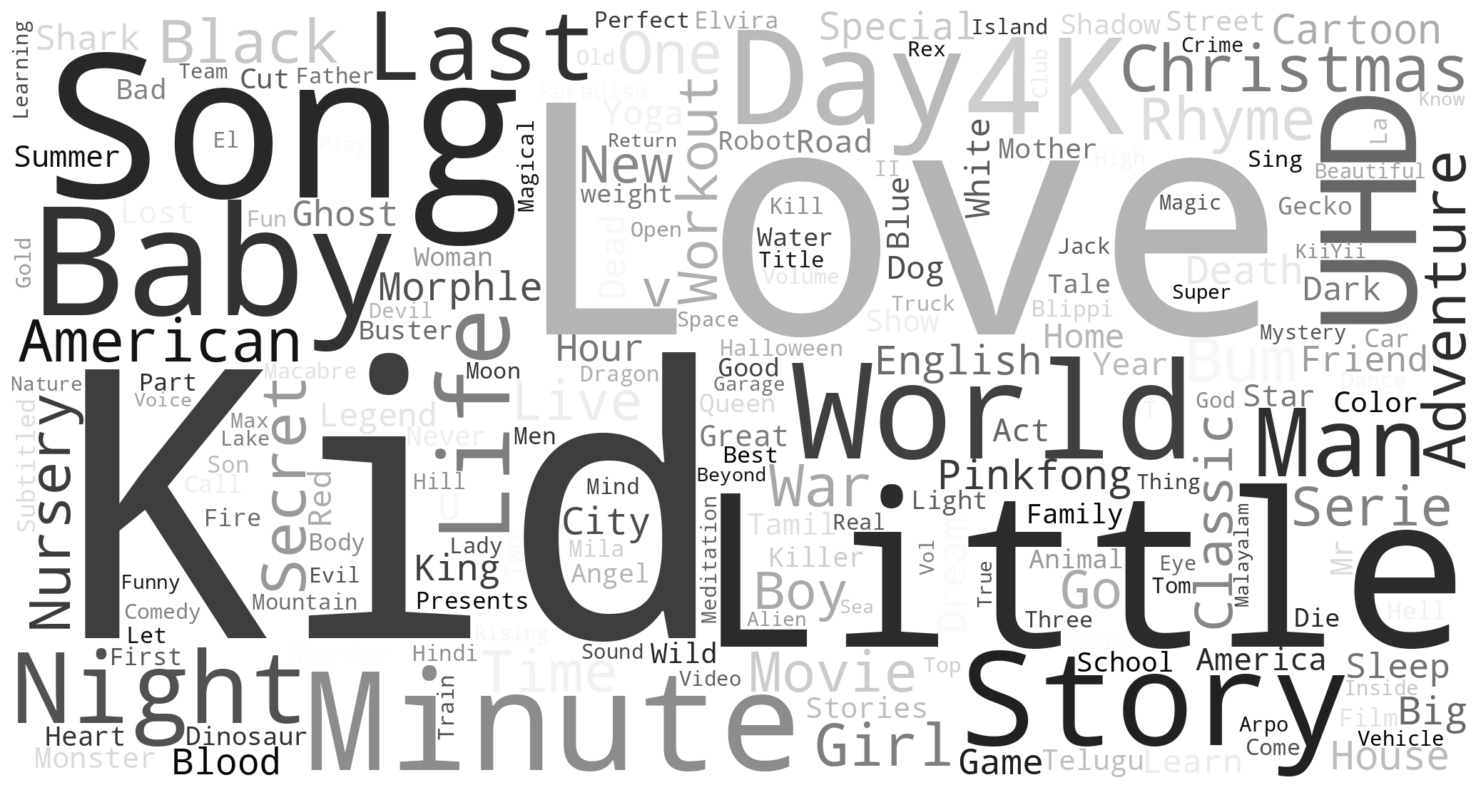

In [ ]:
from wordcloud import WordCloud
word_cloud1 = WordCloud(collocations = False, background_color = 'white',width = 2048, height = 1080,colormap='gist_gray').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# creating the text variable
from wordcloud import WordCloud
txt2 = " ".join(listed_in for listed_in in data.listed_in)

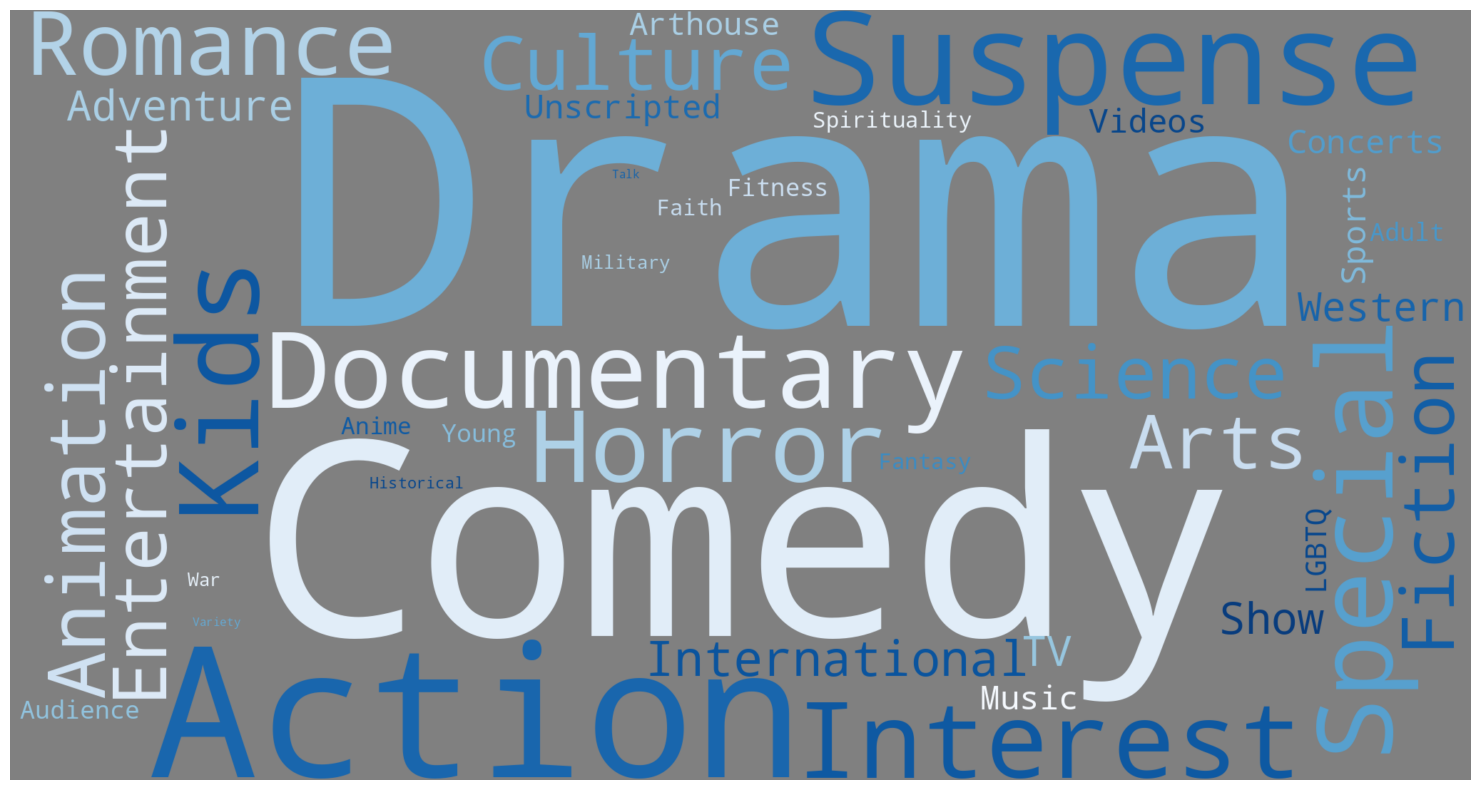

In [ ]:
word_cloud2 = WordCloud(collocations = False, background_color = 'grey',width = 2048, height = 1080,colormap='Blues_r').generate(txt2)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


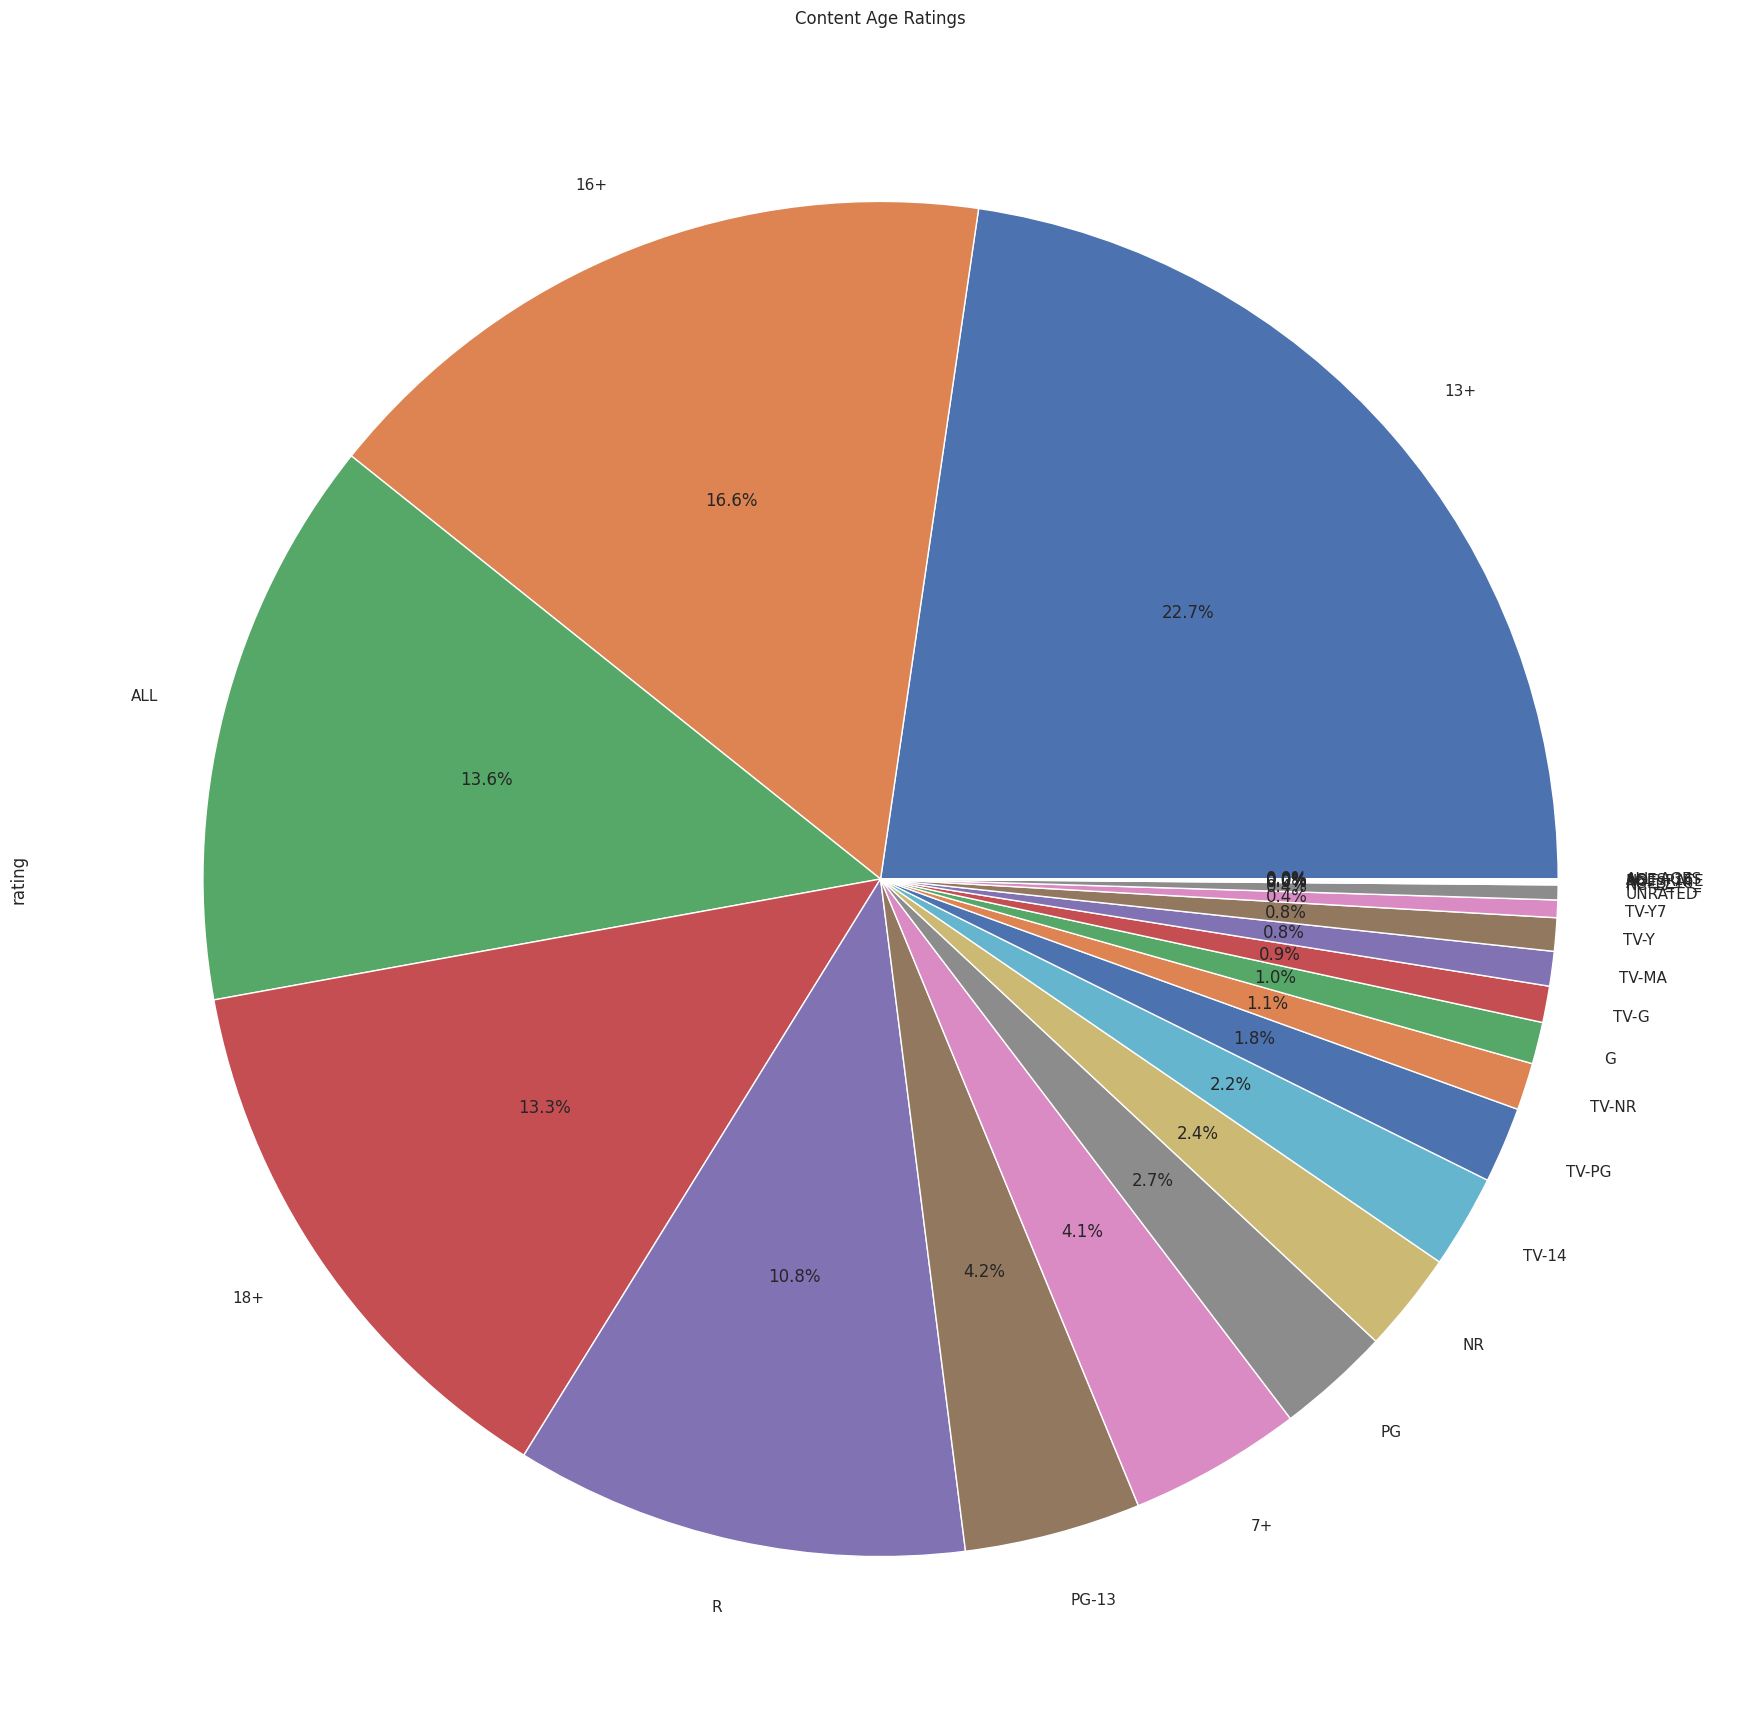

In [ ]:
plt.figure(figsize=(22,22))
data['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Content Age Ratings')
plt.show()

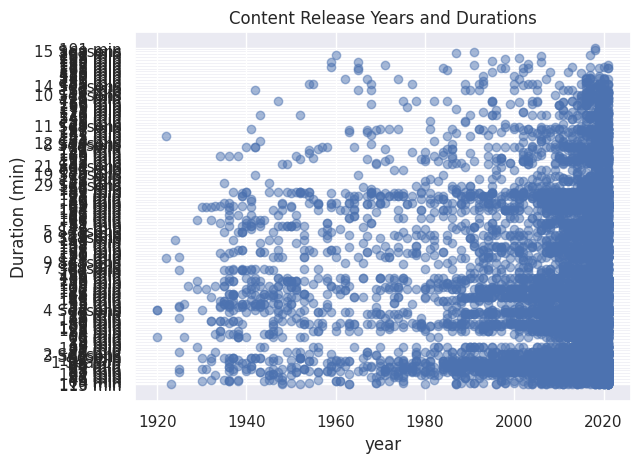

In [ ]:
plt.scatter(data['release_year'], data['duration'], alpha=0.5)
plt.xlabel('year')
plt.ylabel('Duration (min)')
plt.title('Content Release Years and Durations')
plt.show()

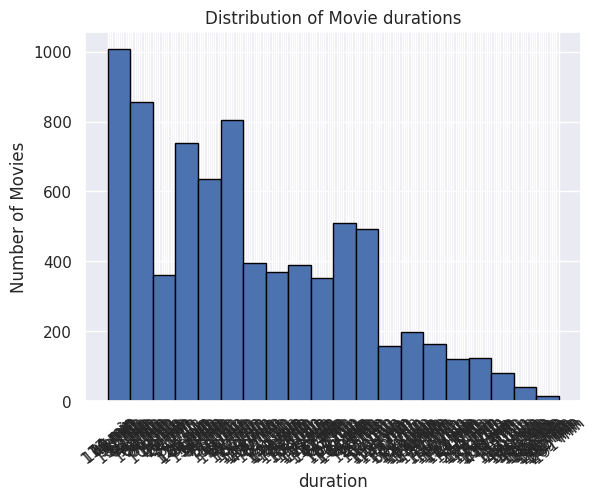

In [ ]:
#histogram of movie durations
movies = data[data['type'] == 'Movie']
plt.hist(movies['duration'], bins=20, edgecolor='black')
plt.xlabel('duration')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie durations')
plt.xticks(rotation=40)
plt.show()

0

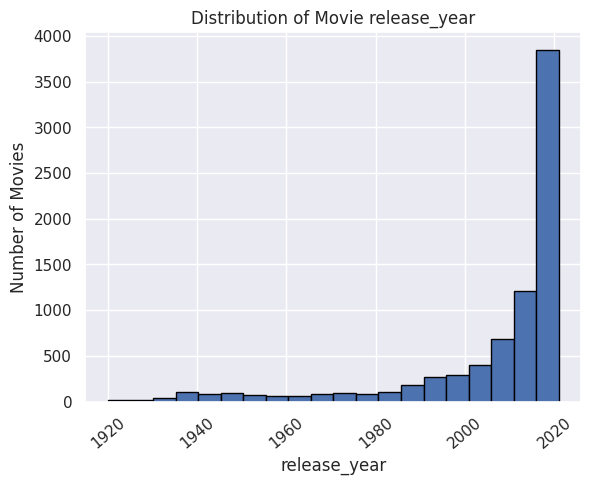

In [ ]:
#histogram of movie durations
movies = data[data['type'] == 'Movie']
plt.hist(movies['release_year'], bins=20, edgecolor='black')
plt.xlabel('release_year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie release_year')
plt.xticks(rotation=40)
plt.show()

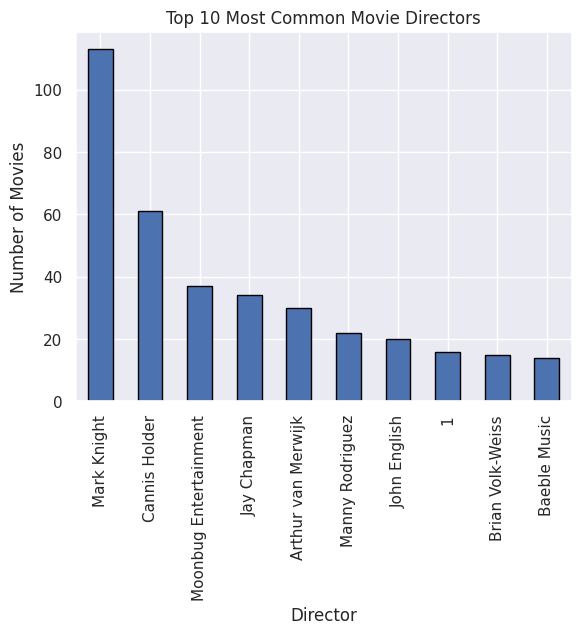

In [ ]:
# Assuming the 'director' column is available in the dataset and only movies are included
movies = data[data['type'] == 'Movie']
top_directors = movies['director'].value_counts().nlargest(10)
top_directors.plot(kind='bar', edgecolor='black')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Common Movie Directors')
plt.show()

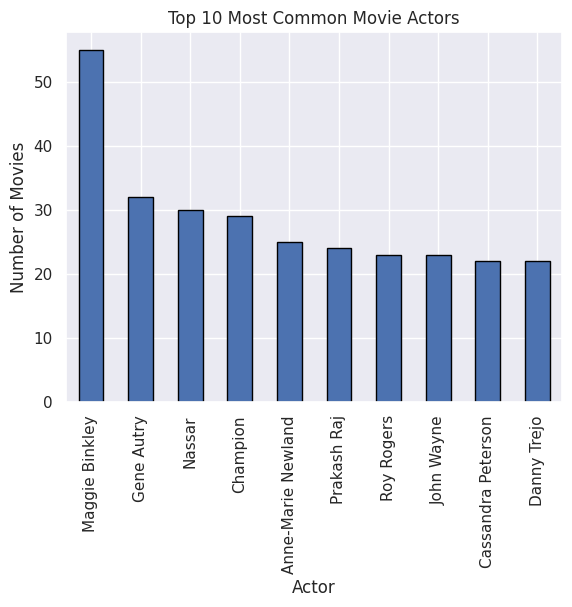

In [ ]:
# Assuming the 'cast' column is available in the dataset and only movies are included
movies = data[data['type'] == 'Movie']  # Assuming 'Type' column indicates whether it's a movie or TV show
top_actors = pd.Series(movies['cast'].str.split(', ').explode()).value_counts().nlargest(10)
top_actors.plot(kind='bar', edgecolor='black')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Common Movie Actors')
plt.show()

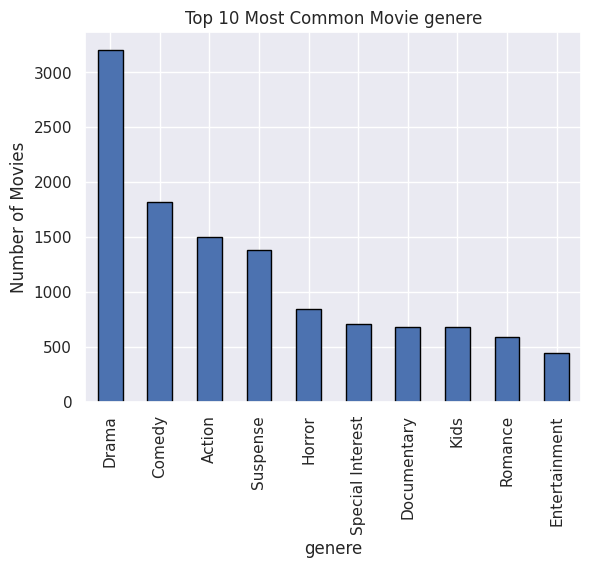

In [ ]:
# Assuming the 'listed_in' column is available in the dataset and only movies are included
movies = data[data['type'] == 'Movie']  # Assuming 'Type' column indicates whether it's a movie or TV show
top_genere = pd.Series(movies['listed_in'].str.split(', ').explode()).value_counts().nlargest(10)
top_genere.plot(kind='bar', edgecolor='black')
plt.xlabel('genere')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Common Movie genere')
plt.show()

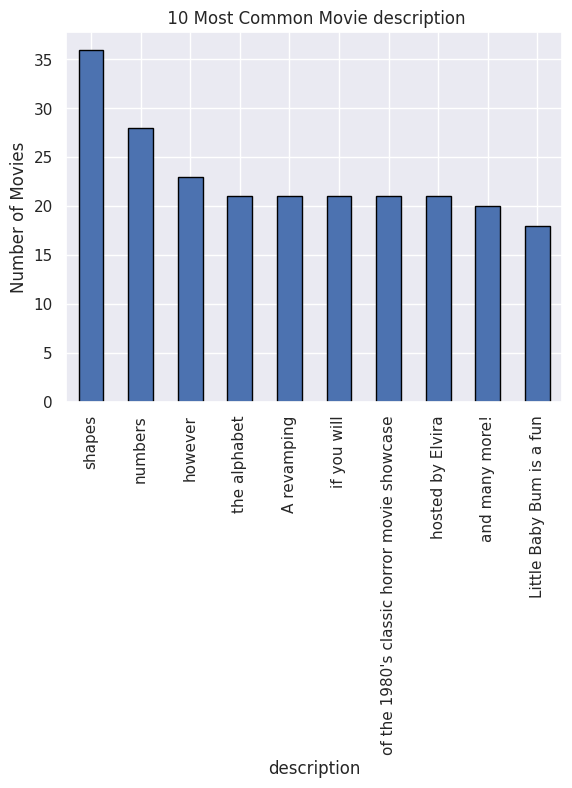

In [ ]:
# Assuming the 'description' column is available in the dataset and only movies are included
movies = data[data['type'] == 'Movie']  # Assuming 'Type' column indicates whether it's a movie or TV show
description = pd.Series(movies['description'].str.split(', ').explode()).value_counts().nlargest(10)
description.plot(kind='bar', edgecolor='black')
plt.xlabel('description')
plt.ylabel('Number of Movies')
plt.title(' 10 Most Common Movie description')
plt.show()

<ipython-input-28-33087928d18d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


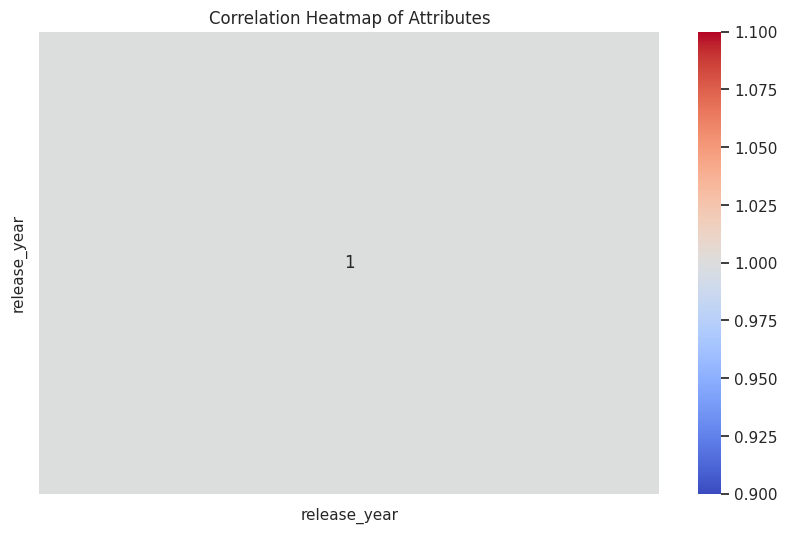

In [ ]:
# Create a heatmap to show the correlation between attributes
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Attributes')
plt.show()